In [77]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [78]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"

columns = [
    "Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"
]

data = pd.read_csv(url, names=columns)

data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


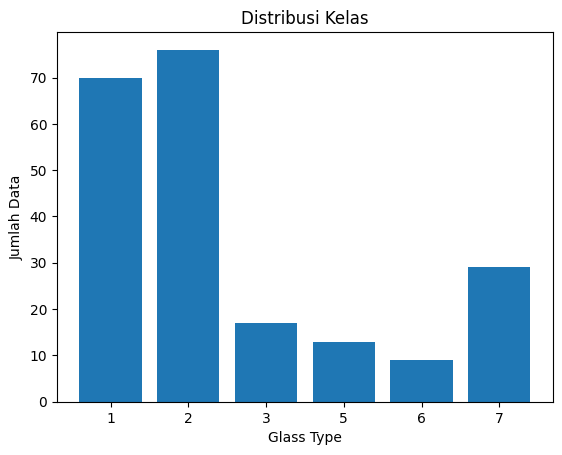

In [79]:
plt.figure()
plt.bar(class_counts.index.astype(str), class_counts.values)
plt.xlabel("Glass Type")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Kelas")
plt.show()

In [80]:
X = data.drop(["Id","Type"], axis=1)
y = data["Type"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)

(171, 9) (43, 9)


In [82]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
mlp1 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp1.fit(X_train, y_train)

y_pred1 = mlp1.predict(X_test)

print("1 Hidden Layer dengan neuron 10")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

1 Hidden Layer dengan neuron 10
Accuracy: 0.7906976744186046
[[10  1  0  0  0  0]
 [ 2 11  0  1  0  0]
 [ 2  0  1  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  2  1]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.71      0.91      0.80        11
           2       0.79      0.79      0.79        14
           3       1.00      0.33      0.50         3
           5       0.67      0.50      0.57         4
           6       1.00      0.67      0.80         3
           7       0.89      1.00      0.94         8

    accuracy                           0.79        43
   macro avg       0.84      0.70      0.73        43
weighted avg       0.81      0.79      0.78        43



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [84]:
mlp2 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp2.fit(X_train, y_train)

y_pred2 = mlp2.predict(X_test)

print("1 Hidden Layer dengan neuron 50")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

1 Hidden Layer dengan neuron 50
Accuracy: 0.813953488372093
[[ 9  1  1  0  0  0]
 [ 2 11  1  0  0  0]
 [ 0  1  2  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.82      0.82      0.82        11
           2       0.73      0.79      0.76        14
           3       0.50      0.67      0.57         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.81        43
   macro avg       0.84      0.80      0.80        43
weighted avg       0.83      0.81      0.81        43



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [85]:
mlp3 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp3.fit(X_train, y_train)

y_pred3 = mlp3.predict(X_test)

print("1 Hidden Layer dengan neuron 100")
print("Accuracy:", accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

1 Hidden Layer dengan neuron 100
Accuracy: 0.7441860465116279
[[ 8  1  2  0  0  0]
 [ 2 10  0  1  0  1]
 [ 0  1  2  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  1  0  0  2  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.80      0.73      0.76        11
           2       0.67      0.71      0.69        14
           3       0.50      0.67      0.57         3
           5       0.67      0.50      0.57         4
           6       1.00      0.67      0.80         3
           7       0.89      1.00      0.94         8

    accuracy                           0.74        43
   macro avg       0.75      0.71      0.72        43
weighted avg       0.75      0.74      0.74        43



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [86]:
mlp4 = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000, random_state=42)
mlp4.fit(X_train, y_train)

y_pred4 = mlp4.predict(X_test)

print("2 Hidden Layer dengan neuron 100 dan 50")
print("Accuracy:", accuracy_score(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

2 Hidden Layer dengan neuron 100 dan 50
Accuracy: 0.7441860465116279
[[ 9  1  1  0  0  0]
 [ 2 10  1  0  0  1]
 [ 1  0  2  0  0  0]
 [ 0  2  0  2  0  0]
 [ 1  0  0  1  1  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.69      0.82      0.75        11
           2       0.77      0.71      0.74        14
           3       0.50      0.67      0.57         3
           5       0.67      0.50      0.57         4
           6       1.00      0.33      0.50         3
           7       0.89      1.00      0.94         8

    accuracy                           0.74        43
   macro avg       0.75      0.67      0.68        43
weighted avg       0.76      0.74      0.74        43

